Step 1: Data Cleaning
You have collected your data, time to further clean it.

A cleaned dataset is a dataset that doesn't contain any duplicates, has no blank spaces, and has no other obvious errors.<br> The rest of the analysis is worthless if you neglect this step; Garbage In, Garbage Out.

Take care of the following:

- No duplicates
- No blank spaces (e.g. " I love python " => "I love python")
- No empty values (set them to None or NaN)
- No wrongly encoded values (e.g. a text value in the price column)

In [210]:
import pandas as pd
import numpy as np
import csv

## Merge dataframes

In [211]:
immo_house = pd.read_csv(r"C:\Users\fabie\OneDrive\Documenten\BeCodeGhent\Projects\immo-eliza-MAS-FN-analysis\data\RawData_house_sale.csv")
immo_apartment = pd.read_csv(r"C:\Users\fabie\OneDrive\Documenten\BeCodeGhent\Projects\immo-eliza-MAS-FN-analysis\data\RawData_apartment_sale.csv")

In [212]:
merged = pd.concat([immo_house, immo_apartment])

# write to csv
import os

path = r'C:\Users\fabie\OneDrive\Documenten\BeCodeGhent\Projects\immo-eliza-MAS-FN-analysis\data'
merged.to_csv(os.path.join(path,r'RawData_merged.csv'))

#merged.to_csv("RawData_merged.csv")


## Exploring the DataFrame

In [213]:
display(immo_house.head(10))


Unnamed: 0                                                url          id  \
0           0  https://www.immoweb.be/en/classified/house/for...  11128213.0   
1           1  https://www.immoweb.be/en/classified/house/for...  11130920.0   
2           2  https://www.immoweb.be/en/classified/house/for...  11119431.0   
3           3  https://www.immoweb.be/en/classified/house/for...  11132583.0   
4           4  https://www.immoweb.be/en/classified/house/for...  10874763.0   
5           5  https://www.immoweb.be/en/classified/villa/for...  11135548.0   
6           6  https://www.immoweb.be/en/classified/house/for...  10768012.0   
7           7  https://www.immoweb.be/en/classified/house/for...  10927220.0   
8           8  https://www.immoweb.be/en/classified/house/for...  11006302.0   
9           9  https://www.immoweb.be/en/classified/house/for...  11130919.0   

     region       province             locality  zip_code  Longitude  \
0  Flanders  East Flanders             Wetteren    9230.0   3.884853   
1  Flanders  East Flanders                Ronse    9600.0   3.609445   
2  Flanders  East Flanders                Ronse    9600.0   3.613201   
3  Wallonie          Liège               Neupré    4121.0   5.488573   
4  Wallonie          Liège                  Ans    4430.0   5.519029   
5  Flanders  East Flanders                Ronse    9600.0   3.633878   
6  Wallonie          Liège               CHÊNÉE    4032.0   5.615752   
7  Wallonie          Liège            Wasseiges    4219.0   5.044013   
8  Wallonie          Liège  Villers-le-Bouillet    4530.0   5.269741   
9  Flanders  East Flanders                Ronse    9600.0   3.615662   

    Latitude property_type  ... garden_area  surface_land  number_facades  \
0  51.011410         HOUSE  ...         NaN          90.0             2.0   
1  50.740380         HOUSE  ...       350.0         555.0             3.0   
2  50.737229         HOUSE  ...       101.0         196.0             2.0   
3  50.548515         HOUSE  ...       500.0         601.0             3.0   
4  50.660049         HOUSE  ...       110.0         261.0             2.0   
5  50.741927         HOUSE  ...       351.0         674.0             3.0   
6  50.607251         HOUSE  ...       720.0         915.0             2.0   
7  50.630242         HOUSE  ...       300.0         405.0             2.0   
8  50.565606         HOUSE  ...       170.0         435.0             4.0   
9  50.747759         HOUSE  ...         NaN         100.0             2.0   

   swimming_pool building_state energy_type  EPC_score  \
0          False           GOOD         GAS          B   
1          False  TO_BE_DONE_UP     FUELOIL          F   
2          False         AS_NEW         GAS          A   
3          False           GOOD     FUELOIL          E   
4          False           GOOD         GAS          G   
5          False    TO_RENOVATE         GAS          E   
6            NaN    TO_RENOVATE         GAS          F   
7          False         AS_NEW      PELLET          C   
8          False           GOOD         GAS          D   
9          False         AS_NEW         GAS          C   

  EnergyConsumptionPerSqm  parking_outdoor parking_indoor  
0                   193.0              NaN            NaN  
1                   737.0              3.0            1.0  
2                    57.0              NaN            NaN  
3                   348.0              NaN            1.0  
4                   577.0              NaN            NaN  
5                   471.0              5.0            1.0  
6                   479.0              NaN            NaN  
7                   219.0              2.0            NaN  
8                   309.0              NaN            1.0  
9                   251.0              NaN            NaN  

[10 rows x 30 columns]

In [214]:
immo_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               19980 non-null  int64  
 1   url                      19736 non-null  object 
 2   id                       19736 non-null  float64
 3   region                   19697 non-null  object 
 4   province                 19697 non-null  object 
 5   locality                 19736 non-null  object 
 6   zip_code                 19736 non-null  float64
 7   Longitude                16784 non-null  float64
 8   Latitude                 16784 non-null  float64
 9   property_type            19736 non-null  object 
 10  property_subtype         19736 non-null  object 
 11  price                    18794 non-null  float64
 12  number_rooms             18795 non-null  float64
 13  living_area              17900 non-null  float64
 14  kitchen               

In [215]:
immo_house.shape

(19980, 30)

In [216]:
immo_house.describe()

Unnamed: 0            id      zip_code     Longitude      Latitude  \
count  19980.000000  1.973600e+04  19736.000000  16784.000000  16784.000000   
mean    9989.500000  1.106375e+07   5257.617856      4.323839     50.875521   
std     5767.873525  2.221706e+05   3246.267291      0.781049      0.331030   
min        0.000000  6.349237e+06   1000.000000      2.372534     44.082694   
25%     4994.750000  1.105059e+07   2260.000000      3.730601     50.716830   
50%     9989.500000  1.115271e+07   4540.000000      4.364035     50.906474   
75%    14984.250000  1.116395e+07   8510.000000      4.823802     51.120377   
max    19979.000000  1.117488e+07  59270.000000      6.236419     51.487429   

              price  number_rooms   living_area    fireplace  terrace_area  \
count  1.879400e+04  18795.000000  17900.000000  3935.000000   6493.000000   
mean   4.821232e+05      3.337749    203.401453    -0.501906     32.462806   
std    5.461876e+05      1.841113    185.396423     0.888516    104.838795   
min    2.300000e+04      0.000000     12.000000    -1.000000      1.000000   
25%    2.490000e+05      2.000000    120.000000    -1.000000     12.000000   
50%    3.490000e+05      3.000000    167.000000    -1.000000     20.000000   
75%    5.139108e+05      4.000000    233.000000    -1.000000     36.000000   
max    1.145000e+07     36.000000   8073.000000     8.000000   6550.000000   

         garden_area   surface_land  number_facades  EnergyConsumptionPerSqm  \
count    5654.000000   15254.000000    14964.000000             1.625800e+04   
mean      749.643969    1168.940081        2.914662             1.611543e+03   
std      3342.175923    8594.455578        0.863544             1.586702e+05   
min         1.000000       0.000000        1.000000            -3.600000e+01   
25%        85.000000     168.000000        2.000000             1.850000e+02   
50%       227.000000     388.000000        3.000000             2.900000e+02   
75%       630.000000     894.000000        4.000000             4.340000e+02   
max    150000.000000  917440.000000        8.000000             2.023112e+07   

       parking_outdoor  parking_indoor  
count      6967.000000     8765.000000  
mean          3.436773        1.640730  
std          24.118653        2.754476  
min           1.000000        1.000000  
25%           1.000000        1.000000  
50%           2.000000        1.000000  
75%           4.000000        2.000000  
max        1970.000000       72.000000

## Components of the DF

In [217]:
immo_house.values

array([[0,
        'https://www.immoweb.be/en/classified/house/for-sale/wetteren/9230/11128213',
        11128213.0, ..., 193.0, nan, nan],
       [1,
        'https://www.immoweb.be/en/classified/house/for-sale/ronse/9600/11130920',
        11130920.0, ..., 737.0, 3.0, 1.0],
       [2,
        'https://www.immoweb.be/en/classified/house/for-sale/ronse/9600/11119431',
        11119431.0, ..., 57.0, nan, nan],
       ...,
       [19977,
        'https://www.immoweb.be/en/classified/apartment/for-sale/ganshoren/1083/11151062',
        11151062.0, ..., 141.0, nan, nan],
       [19978,
        'https://www.immoweb.be/en/classified/apartment/for-sale/berchem-sainte-agathe/1082/11151061',
        11151061.0, ..., nan, nan, 1.0],
       [19979,
        'https://www.immoweb.be/en/classified/apartment/for-sale/berchem-sainte-agathe/1082/11151060',
        11151060.0, ..., nan, nan, 1.0]], dtype=object)

In [218]:
immo_house.columns

Index(['Unnamed: 0', 'url', 'id', 'region', 'province', 'locality', 'zip_code',
       'Longitude', 'Latitude', 'property_type', 'property_subtype', 'price',
       'number_rooms', 'living_area', 'kitchen', 'furnished', 'fireplace',
       'terrace', 'terrace_area', 'garden', 'garden_area', 'surface_land',
       'number_facades', 'swimming_pool', 'building_state', 'energy_type',
       'EPC_score', 'EnergyConsumptionPerSqm', 'parking_outdoor',
       'parking_indoor'],
      dtype='object')

In [219]:
immo_house.index


RangeIndex(start=0, stop=19980, step=1)

## Check Missing values

In [220]:
# detect missing values
immo_house.isna()
# detect any missing values
immo_house.isna().any()
# count missing values
immo_house.isna().sum()
# sort sum of missing values
missing_sorted = immo_house.isna().sum().sort_values(ascending=False)
display(missing_sorted)
display(type(missing_sorted))

fireplace                  16045
garden_area                14326
garden                     13562
terrace_area               13487
swimming_pool              13451
furnished                  13218
parking_outdoor            13013
parking_indoor             11215
terrace                     9142
energy_type                 5863
building_state              5551
number_facades              5016
surface_land                4726
EnergyConsumptionPerSqm     3722
EPC_score                   3354
Latitude                    3196
Longitude                   3196
kitchen                     2456
living_area                 2080
price                       1186
number_rooms                1185
province                     283
region                       283
id                           244
locality                     244
property_type                244
zip_code                     244
url                          244
property_subtype             244
Unnamed: 0                     0
dtype: int

pandas.core.series.Series

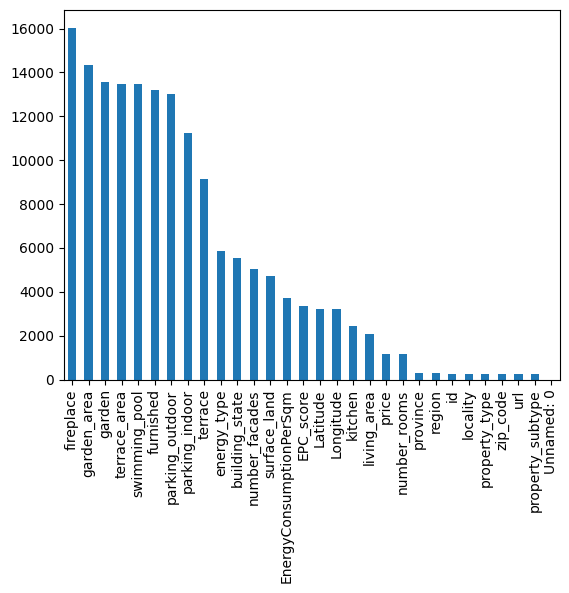

In [221]:
# Plotting missing values
import matplotlib.pyplot as plt
missing_sorted.plot(kind='bar')
plt.show()

## Remove columns

In [222]:
# Remove 6 columns that have the most missing values:
#['garden_area', 'fireplace', 'garden', 'swimming_pool', 'furnished','terrace_area']
remove_columns = missing_sorted ['garden_area':'terrace_area']
display(remove_columns)
print(type(remove_columns))


garden_area     14326
garden          13562
terrace_area    13487
dtype: int64

<class 'pandas.core.series.Series'>


In [223]:
#immo_drop = immo_df.drop(columns = [remove_columns], inplace=True)
#print(immo_drop)

In [224]:
#immo_df.drop(columns = ['garden_area', 'fireplace', 'garden', 'swimming_pool', 'furnished','terrace_area'], inplace=True)
#display(immo_df)

## Remove duplicates: there are no duplicates in the raw data

## Check for blank spaces in strings

## Check for empty values: 

In [225]:
#immo_null = immo_drop_dup.isnull() #is the same as isna()
#display(immo_null)
#immo_nan = immo_drop_dup.replace('', np.nan, inplace=False)
#display(immo_nan)

In [226]:
display(immo_house.isnull().sum().sort_values(ascending=False)) # check numbers of null value in each column
#immo_nan = immo_house.fillna("NaN") # Replace empty/null values with "NaN"
#display(immo_nan.isnull().sum()) # check numbers of null value in each column
#display(immo_nan)

fireplace                  16045
garden_area                14326
garden                     13562
terrace_area               13487
swimming_pool              13451
furnished                  13218
parking_outdoor            13013
parking_indoor             11215
terrace                     9142
energy_type                 5863
building_state              5551
number_facades              5016
surface_land                4726
EnergyConsumptionPerSqm     3722
EPC_score                   3354
Latitude                    3196
Longitude                   3196
kitchen                     2456
living_area                 2080
price                       1186
number_rooms                1185
province                     283
region                       283
id                           244
locality                     244
property_type                244
zip_code                     244
url                          244
property_subtype             244
Unnamed: 0                     0
dtype: int

## Remove rows with missing values

In [227]:
# Function to drop observations with missing 'id' and 'price'
def drop_missing_values(df):
    """
    Drop observations with missing values in 'id' and 'price' columns.
    Parameters:
    - df: pandas DataFrame, the DataFrame to be cleaned
    Returns:
    - pandas DataFrame, the cleaned DataFrame
    """
    # Drop missing observations for 'id' and 'price' columns
    df_cleaned = df.dropna(subset=['id', 'price', 'province', 'region'])

    # Check if there are any missing values left in 'id' and 'price' columns
    if df_cleaned['id'].isnull().any() or df_cleaned['price'].isnull().any() or df_cleaned['province'].isnull().any() or df_cleaned['region'].isnull().any():
        print("Warning: Missing values still present after dropping.")
    else:
        print("Missing values in 'id', 'price', 'province' and 'region' successfully dropped.")

    return df_cleaned

# Replace 'house' with the actual name of your DataFrame
house_cleaned = drop_missing_values(immo_house)
display(house_cleaned.head())

# Save the cleaned DataFrame as 'house_cleaned.csv' in the 'Data' folder

import os

path = r'C:\Users\fabie\OneDrive\Documenten\BeCodeGhent\Projects\immo-eliza-MAS-FN-analysis\data'
house_cleaned.to_csv(os.path.join(path,r'house_cleaned.csv'))
#house_cleaned.to_csv(os.path.join(data_folder, 'house_cleaned.csv'), index=False)


Missing values in 'id', 'price', 'province' and 'region' successfully dropped.


Unnamed: 0                                                url          id  \
0           0  https://www.immoweb.be/en/classified/house/for...  11128213.0   
1           1  https://www.immoweb.be/en/classified/house/for...  11130920.0   
2           2  https://www.immoweb.be/en/classified/house/for...  11119431.0   
3           3  https://www.immoweb.be/en/classified/house/for...  11132583.0   
4           4  https://www.immoweb.be/en/classified/house/for...  10874763.0   

     region       province  locality  zip_code  Longitude   Latitude  \
0  Flanders  East Flanders  Wetteren    9230.0   3.884853  51.011410   
1  Flanders  East Flanders     Ronse    9600.0   3.609445  50.740380   
2  Flanders  East Flanders     Ronse    9600.0   3.613201  50.737229   
3  Wallonie          Liège    Neupré    4121.0   5.488573  50.548515   
4  Wallonie          Liège       Ans    4430.0   5.519029  50.660049   

  property_type  ... garden_area  surface_land  number_facades  swimming_pool  \
0         HOUSE  ...         NaN          90.0             2.0          False   
1         HOUSE  ...       350.0         555.0             3.0          False   
2         HOUSE  ...       101.0         196.0             2.0          False   
3         HOUSE  ...       500.0         601.0             3.0          False   
4         HOUSE  ...       110.0         261.0             2.0          False   

  building_state energy_type  EPC_score EnergyConsumptionPerSqm  \
0           GOOD         GAS          B                   193.0   
1  TO_BE_DONE_UP     FUELOIL          F                   737.0   
2         AS_NEW         GAS          A                    57.0   
3           GOOD     FUELOIL          E                   348.0   
4           GOOD         GAS          G                   577.0   

   parking_outdoor parking_indoor  
0              NaN            NaN  
1              3.0            1.0  
2              NaN            NaN  
3              NaN            1.0  
4              NaN            NaN  

[5 rows x 30 columns]

In [260]:
print(house_cleaned['property_type'])
import pandas as pd

# Filter the DataFrame to keep only rows where the property subtype is "HOUSE"
house_cleaned1 = house_cleaned[house_cleaned['property_type'] == 'HOUSE']
house_cleaned2 = house_cleaned1[house_cleaned1['property_subtype'] != 'APARTMENT_BLOCK']

# Display the filtered DataFrame
display(house_cleaned1.head())
print(house_cleaned1['property_type'])
print(house_cleaned2['property_subtype'])


0            HOUSE
1            HOUSE
2            HOUSE
3            HOUSE
4            HOUSE
           ...    
19975        HOUSE
19976        HOUSE
19977    APARTMENT
19978    APARTMENT
19979    APARTMENT
Name: property_type, Length: 18758, dtype: object


Unnamed: 0                                                url          id  \
0           0  https://www.immoweb.be/en/classified/house/for...  11128213.0   
1           1  https://www.immoweb.be/en/classified/house/for...  11130920.0   
2           2  https://www.immoweb.be/en/classified/house/for...  11119431.0   
3           3  https://www.immoweb.be/en/classified/house/for...  11132583.0   
4           4  https://www.immoweb.be/en/classified/house/for...  10874763.0   

     region       province  locality  zip_code  Longitude   Latitude  \
0  Flanders  East Flanders  Wetteren    9230.0   3.884853  51.011410   
1  Flanders  East Flanders     Ronse    9600.0   3.609445  50.740380   
2  Flanders  East Flanders     Ronse    9600.0   3.613201  50.737229   
3  Wallonie          Liège    Neupré    4121.0   5.488573  50.548515   
4  Wallonie          Liège       Ans    4430.0   5.519029  50.660049   

  property_type  ... garden_area  surface_land  number_facades  swimming_pool  \
0         HOUSE  ...         NaN          90.0             2.0          False   
1         HOUSE  ...       350.0         555.0             3.0          False   
2         HOUSE  ...       101.0         196.0             2.0          False   
3         HOUSE  ...       500.0         601.0             3.0          False   
4         HOUSE  ...       110.0         261.0             2.0          False   

  building_state energy_type  EPC_score EnergyConsumptionPerSqm  \
0           GOOD         GAS          B                   193.0   
1  TO_BE_DONE_UP     FUELOIL          F                   737.0   
2         AS_NEW         GAS          A                    57.0   
3           GOOD     FUELOIL          E                   348.0   
4           GOOD         GAS          G                   577.0   

   parking_outdoor parking_indoor  
0              NaN            NaN  
1              3.0            1.0  
2              NaN            NaN  
3              NaN            1.0  
4              NaN            NaN  

[5 rows x 30 columns]

0        HOUSE
1        HOUSE
2        HOUSE
3        HOUSE
4        HOUSE
         ...  
19972    HOUSE
19973    HOUSE
19974    HOUSE
19975    HOUSE
19976    HOUSE
Name: property_type, Length: 15234, dtype: object
0        HOUSE
1        HOUSE
2        HOUSE
3        HOUSE
4        HOUSE
         ...  
19972    HOUSE
19973    HOUSE
19974    HOUSE
19975    HOUSE
19976    HOUSE
Name: property_subtype, Length: 14513, dtype: object


In [229]:
# Explore house_cleaned
house_cleaned.shape
house_cleaned.count()
house_cleaned.info()
house_cleaned.describe()


Unnamed: 0                 18758
url                        18758
id                         18758
region                     18758
province                   18758
locality                   18758
zip_code                   18758
Longitude                  15955
Latitude                   15955
property_type              18758
property_subtype           18758
price                      18758
number_rooms               18758
living_area                17866
kitchen                    16547
furnished                   6743
fireplace                   3914
terrace                    10810
terrace_area                6469
garden                      6413
garden_area                 5649
surface_land               15234
number_facades             14943
swimming_pool               6515
building_state             14412
energy_type                14110
EPC_score                  16501
EnergyConsumptionPerSqm    16127
parking_outdoor             6850
parking_indoor              8673
dtype: int

## Check for Unique or missing values

### Analysis of parking_indoor, parking_outdoor, surface_land, number_facades, surface_land

In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [232]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

parking_indoor = analyze_column(immo_house, "parking_indoor")


Analysis for column 'parking_indoor':
Number of NaN values: 11215
Number of unique values: 37
Percentage of NaN values: 56.13%
Percentage of unique values: 0.19%
Unique values: [nan  1. 12.  3.  2. 10.  5.  4.  8. 20.  7.  9.  6. 72. 32. 11. 47. 67.
 14. 21. 13. 26. 33. 31. 25. 50. 15. 16. 60. 24. 51. 45. 68. 30. 44. 22.
 23. 18.]


In [233]:
def plot_histogram(data, column_name):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=column_name, bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-tick labels by 45 degrees
    plt.tight_layout()  # Adjust layout to prevent overlapping,
    plt.show()

# parking_indoor = plot_histogram(immo_house, "parking_outdoor")

In [234]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

parking_outdoor = analyze_column(immo_house, "parking_outdoor")

Analysis for column 'parking_outdoor':
Number of NaN values: 13013
Number of unique values: 35
Percentage of NaN values: 65.13%
Percentage of unique values: 0.18%
Unique values: [     nan 3.00e+00 5.00e+00 2.00e+00 4.00e+00 1.00e+00 6.00e+00 1.00e+01
 1.40e+01 8.00e+00 3.00e+01 7.00e+00 1.50e+01 1.97e+03 2.00e+01 1.20e+01
 2.20e+01 2.30e+01 9.00e+00 3.20e+01 1.10e+01 1.60e+01 5.00e+01 1.55e+02
 3.50e+01 3.30e+01 1.20e+02 3.10e+01 2.90e+01 2.50e+01 4.00e+01 6.00e+01
 2.40e+01 1.70e+01 4.40e+01 1.80e+01]


In [235]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

number_facades = analyze_column(immo_house, "number_facades")

Analysis for column 'number_facades':
Number of NaN values: 5016
Number of unique values: 8
Percentage of NaN values: 25.11%
Percentage of unique values: 0.04%
Unique values: [ 2.  3.  4. nan  6.  1.  8.  5.  7.]


In [236]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

price = analyze_column(immo_house, "price")

Analysis for column 'price':
Number of NaN values: 1186
Number of unique values: 1740
Percentage of NaN values: 5.94%
Percentage of unique values: 8.71%
Unique values: [ 249000.  249900.  259000. ... 2650000.  259636.   42500.]


In [237]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

surface_land = analyze_column(immo_house, "surface_land")

Analysis for column 'surface_land':
Number of NaN values: 4726
Number of unique values: 2514
Percentage of NaN values: 23.65%
Percentage of unique values: 12.58%
Unique values: [  90.  555.  196. ... 7215. 5044. 3125.]


In [238]:
#showing outliers
def scatter_plot(data, column_name):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=house_cleaned, x=column_name, y="price", color='skyblue')
        plt.title(f'Scatter Plot of {column_name}')
        plt.xlabel(f'{column_name}')
        plt.ylabel('price')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

#number_facades = scatter_plot(house_cleaned, "parking_outdoor")

In [259]:
column_name = list(house_cleaned.columns)
display(column_name)


['Unnamed: 0',
 'url',
 'id',
 'region',
 'province',
 'locality',
 'zip_code',
 'Longitude',
 'Latitude',
 'property_type',
 'property_subtype',
 'price',
 'number_rooms',
 'living_area',
 'kitchen',
 'furnished',
 'fireplace',
 'terrace',
 'terrace_area',
 'garden',
 'garden_area',
 'surface_land',
 'number_facades',
 'swimming_pool',
 'building_state',
 'energy_type',
 'EPC_score',
 'EnergyConsumptionPerSqm',
 'parking_outdoor',
 'parking_indoor']

In [240]:
cols = list(house_cleaned.loc[:, ("number_rooms", "living_area", "fireplace", "terrace_area", 
           "garden_area", "surface_land", "number_facades", "EnergyConsumptionPerSqm", 
           "parking_outdoor", "parking_indoor")])
print(type(cols))
display(cols)

<class 'list'>


['number_rooms',
 'living_area',
 'fireplace',
 'terrace_area',
 'garden_area',
 'surface_land',
 'number_facades',
 'EnergyConsumptionPerSqm',
 'parking_outdoor',
 'parking_indoor']

In [261]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats

cols = ["number_rooms", "living_area", "fireplace", "terrace_area", 
           "garden_area", "surface_land", "number_facades", "EnergyConsumptionPerSqm", 
           "parking_outdoor", "parking_indoor"]

for col in cols:
    # Calculate the z-score for col in cols
    z = np.abs(stats.zscore(house_cleaned[col]))

    # Identify outliers with a z-score greater than 3
    threshold = 3
    outliers = house_cleaned[z > threshold]

    # drop rows containing outliers
    house_cleaned_outliers = house_cleaned.drop(outliers.index)

    # replace outliers with median value
    house_cleaned_median = house_cleaned.loc[z > threshold, col] = house_cleaned[col].median()

    


In [242]:
# calculate IQR for col in cols
for col in cols:
    Q1 = house_cleaned[col].quantile(0.25)
    Q3 = house_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = house_cleaned[(house_cleaned[col] < Q1 - threshold * IQR) | (house_cleaned[col] > Q3 + threshold * IQR)]


In [243]:
for col in cols:
    hist = px.histogram(house_cleaned_outliers, x=col, y='price')
    hist.show()

In [244]:
for col in cols:
    box = px.box(house_cleaned_outliers, y=col)
    box.show()

In [262]:
import pandas as pd
import numpy as np
import plotly.express as px

cols = ["number_rooms", "living_area", "fireplace", "terrace_area", 
           "garden_area", "surface_land", "number_facades", "EnergyConsumptionPerSqm", 
           "parking_outdoor", "parking_indoor"]
for col in cols:
    scatter = px.scatter(house_cleaned2, x='property_subtype', y=col)
    scatter.show()

In [246]:
scatter = px.scatter(house_cleaned, x='property_subtype', y='price')
scatter.show()

In [247]:
def remove_outliers_zscore(df, column_name, threshold=3):
    """
    Remove outliers from a DataFrame based on the Z-score method.

    Parameters:
        df (DataFrame): Input DataFrame.
        column_name (str): Name of the column containing the data points.
        threshold (float): Z-score threshold for identifying outliers. Default is 3.

    Returns:
        DataFrame: DataFrame with outliers removed.
    """
    # Calculate Z-scores for the specified column
    z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()
    
    # Create a mask to identify outliers
    outlier_mask = np.abs(z_scores) > threshold
    
    print(outlier_mask)

    # Remove outliers from the DataFrame
    #df_filtered = df[~outlier_mask]

    #return df_filtered

#remove_outliers_zscore(house_cleaned, "parking_indoor")

In [248]:
# detect missing values
house_cleaned.isna()
# detect any missing values
house_cleaned.isna().any()
# count missing values
house_cleaned.isna().sum()
# sort sum of missing values
missing_sorted = house_cleaned.isna().sum().sort_values(ascending=False)
display(missing_sorted)
display(type(missing_sorted))

fireplace                  14844
garden_area                13109
garden                     12345
terrace_area               12289
swimming_pool              12243
furnished                  12015
parking_outdoor            11908
parking_indoor             10085
terrace                     7948
energy_type                 4648
building_state              4346
number_facades              3815
surface_land                3524
Latitude                    2803
Longitude                   2803
EnergyConsumptionPerSqm     2631
EPC_score                   2257
kitchen                     2211
living_area                  892
id                             0
region                         0
locality                       0
province                       0
property_type                  0
zip_code                       0
url                            0
number_rooms                   0
price                          0
property_subtype               0
Unnamed: 0                     0
dtype: int

pandas.core.series.Series